<a href="https://colab.research.google.com/github/omerhac/osic-fibrosis/blob/master/exponent_functions_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# images path
IMAGES_GCS_PATH = 'gs://osic_fibrosis/images'

In [2]:
# clone and copy repository
!git clone https://github.com/omerhac/osic-fibrosis.git
!cp -r osic-fibrosis/* ./

Cloning into 'osic-fibrosis'...
remote: Enumerating objects: 362, done.
remote: Counting objects: 100% (362/362), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 362 (delta 222), reused 267 (delta 132), pack-reused 0
Receiving objects: 100% (362/362), 54.94 MiB | 29.94 MiB/s, done.
Resolving deltas: 100% (222/222), done.


# View one prediction graph

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


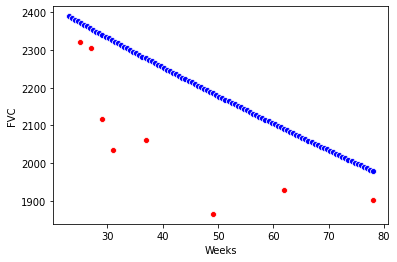

In [3]:
import predict 
import visualize

# plot one patient predicted graph
exp_gen = predict.exponent_generator(IMAGES_GCS_PATH + '/train')
id, func = next(exp_gen)
visualize.plot_patient_exp(id, exp_function=func)

# Plot n_samples of ground truth exponent functions

In [4]:
import table_data
exp_dict = table_data.get_exp_fvc_dict()
train_table = table_data.get_train_table()

# create exponent functiosn dict
func_dict = {}
for id in exp_dict:
  i_week, i_fvc = table_data.get_initial_fvc(id)
  func_dict[id] = predict.ExpFunc(i_fvc, exp_dict[id], i_week)


<Figure size 1440x360 with 0 Axes>

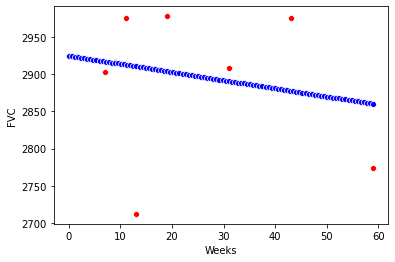

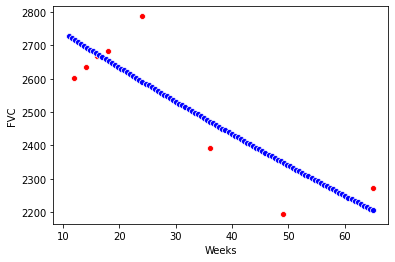

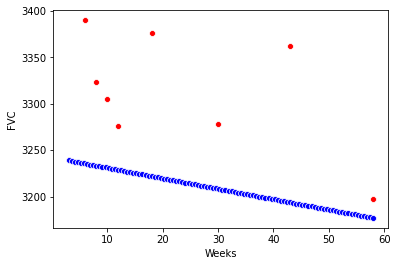

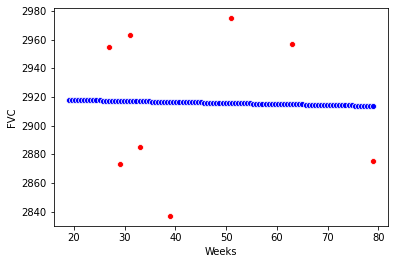

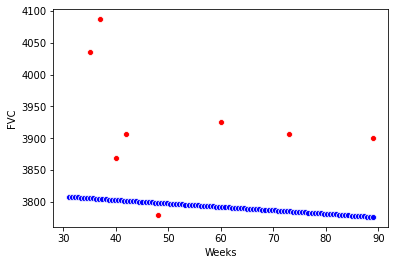

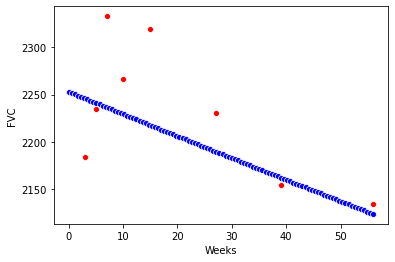

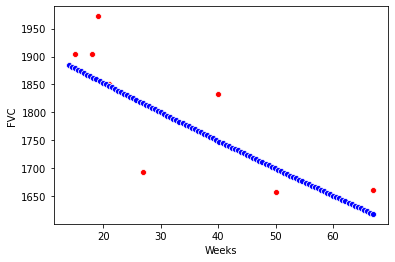

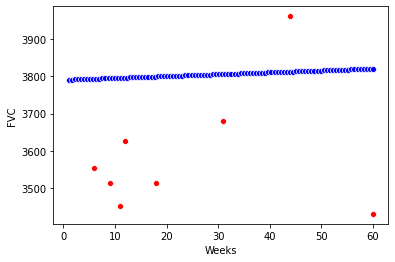

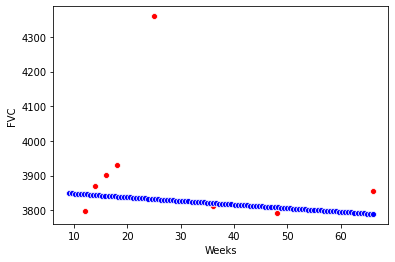

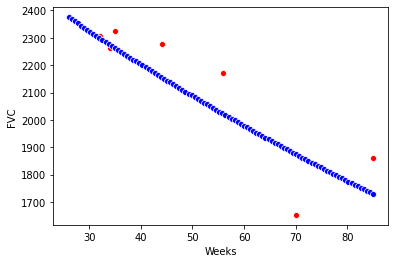

In [5]:
n_samples = 10

# plot
plt.figure(figsize=(20, 5))
for plot in range(n_samples):
  id = np.random.choice(list(func_dict))
  func = func_dict[id]
  visualize.plot_patient_exp(id, exp_function=func)

# Check Laplace Log Lokilhood for ground truth

In [19]:
import metrics

def metric_check(func_dict, n_patients, inifinite=False):
    """Average n_patients random train patients Laplace Log Likelihood score"""
    scores = []

    # get scores
    for i, id in enumerate(func_dict):
        func = func_dict[id]
        score = metrics.get_lll_value_exp_function(id, func)
        scores.append(score)

        # exit rule
        if inifinite:
            print(score) # for infinitely printing scores
        else:
            if i == n_patients - 1:
                break

    return sum(scores) / n_patients
  
  
metric_check(func_dict, 170)

-6.458519115560627